In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import plotly.graph_objs as go
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,precision_recall_curve, roc_curve, auc

In [3]:
df=pd.read_csv('student_marks.csv')

In [4]:
df

,Unnamed: 0,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [5]:
df.info

<bound method DataFrame.info of   Unnamed: 0 Gender         DOB  Maths  Physics  Chemistry  English  Biology  \
0       John      M  05-04-1988     55       45         56       87       21   
1     Suresh      M  04-05-1987     75       96         78       64       90   
2     Ramesh      M  25-05-1989     25       54         89       76       95   
3    Jessica      F  12-08-1990     78       96         86       63       54   
4   Jennifer      F  02-09-1989     58       96         78       46       96   
5       Annu      F  05-04-1988     45       87         52       89       55   
6      pooja      F  04-05-1987     55       64         61       58       75   
7     Ritesh      M  25-05-1989     54       76         87       56       25   
8      Farha      F  12-08-1990     55       63         89       75       78   
9     Mukesh      M  02-09-1989     96       46         77       83       58   

   Economics  History  Civics  
0         52       89      65  
1         61       58  

In [5]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


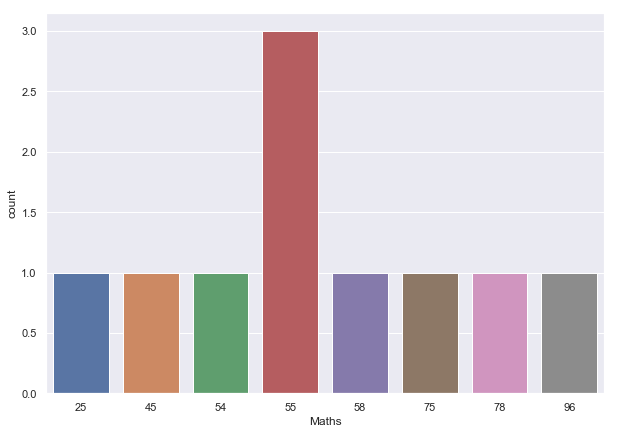

In [6]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df.Maths);

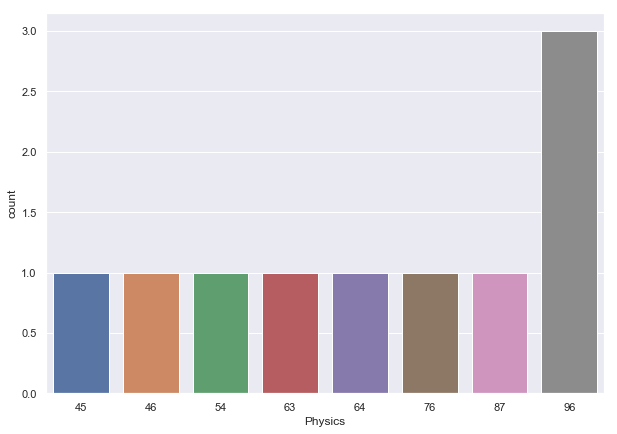

In [7]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df.Physics);

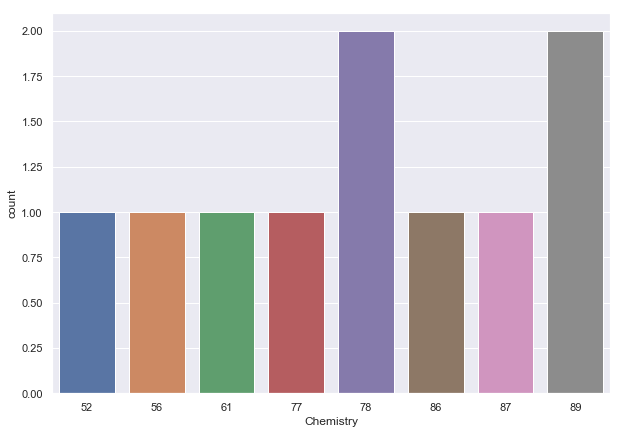

In [8]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df.Chemistry);


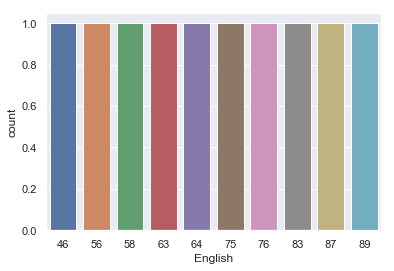

In [9]:
sns.countplot(df.English);
plt.show()

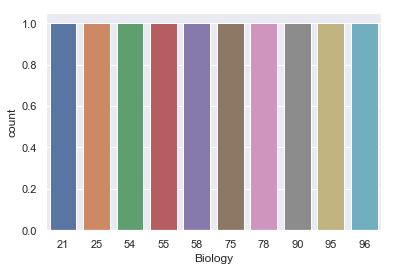

In [10]:
sns.countplot(df.Biology);
plt.show()

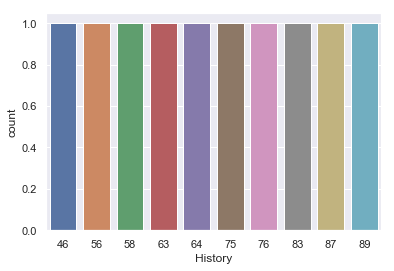

In [11]:
sns.countplot(df.History);
plt.show()

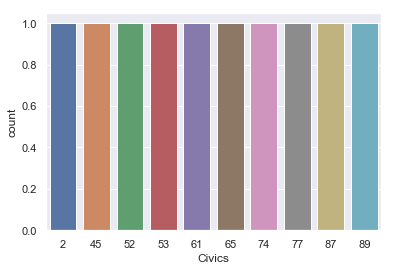

In [12]:
sns.countplot(df.Civics);
plt.show()

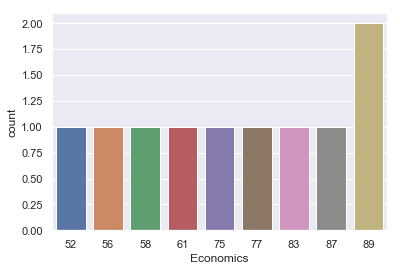

In [13]:
sns.countplot(df.Economics);
plt.show()

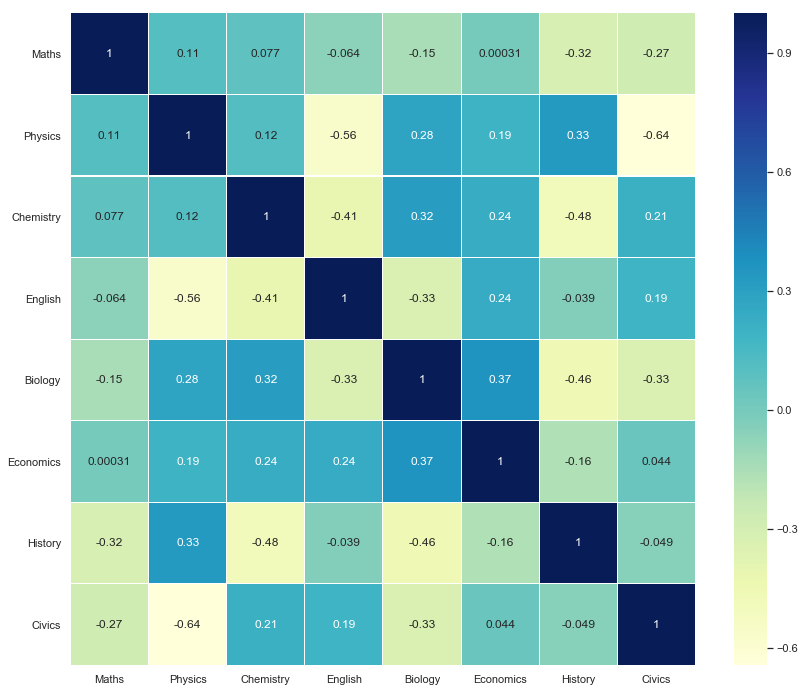

In [15]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [16]:
df['Total']=df['Maths']+df['Economics']+df['English']+df['History']+df['Civics']+df['Physics']+df['Chemistry']+df['Biology']

In [17]:
df['Total']

0    470
1    524
2    556
3    586
4    587
5    556
6    496
7    517
8    587
9    566
Name: Total, dtype: int64

C:\Users\GT\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\GT\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\GT\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\GT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\GT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


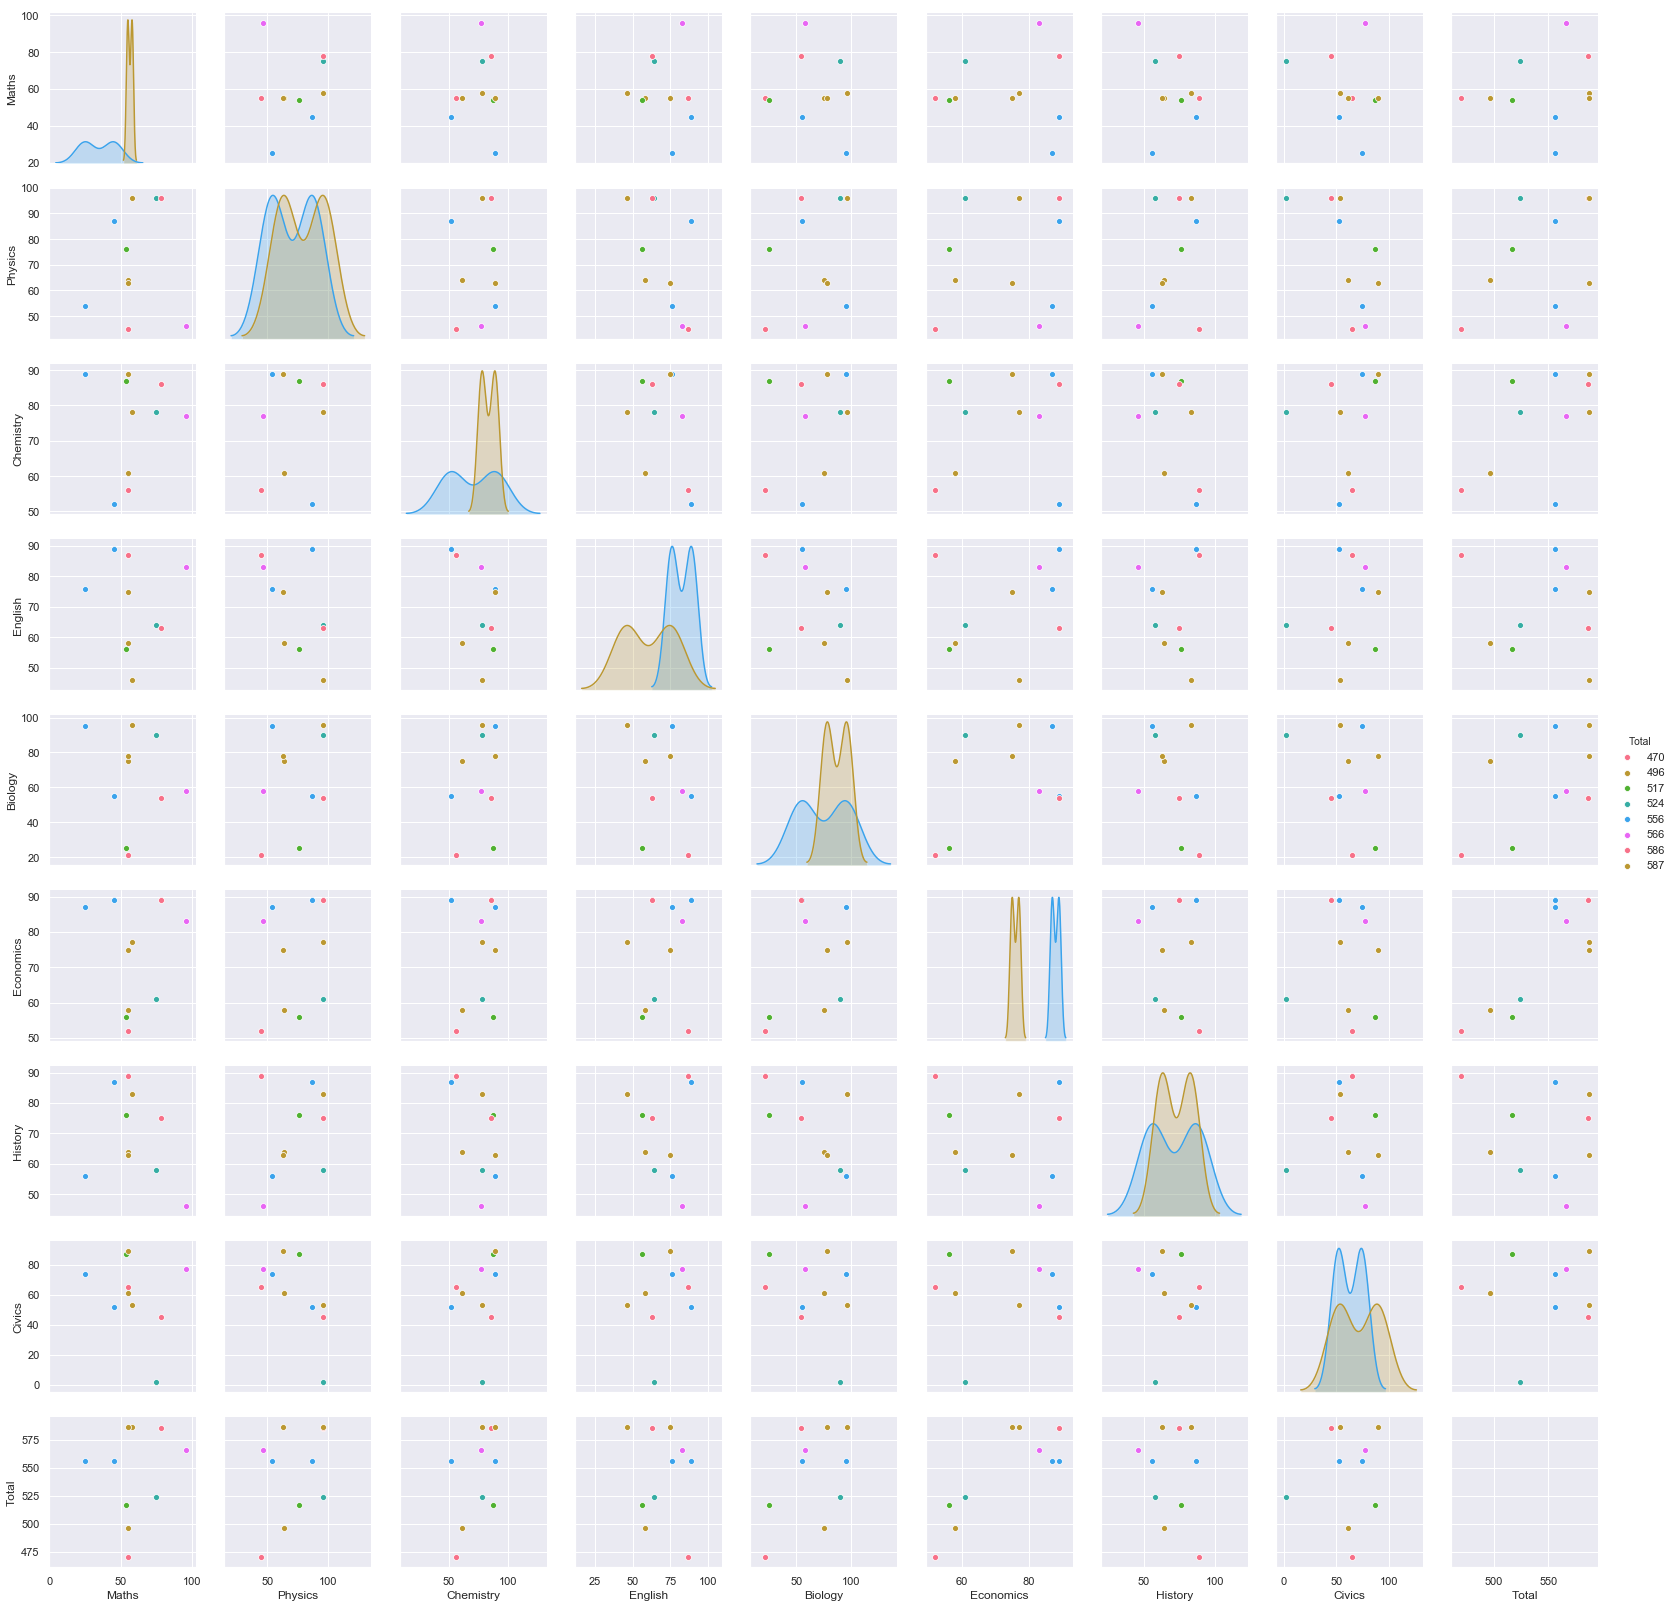

In [18]:
sns.pairplot(df,hue='Total',
             palette = sns.color_palette("husl"), size=2.5)

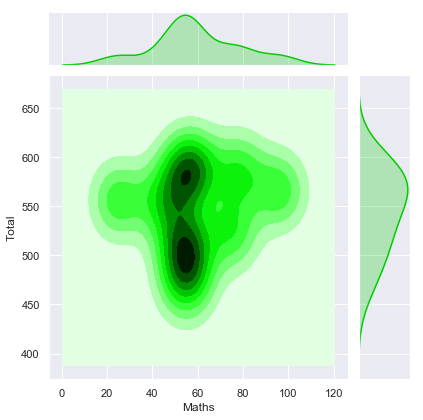

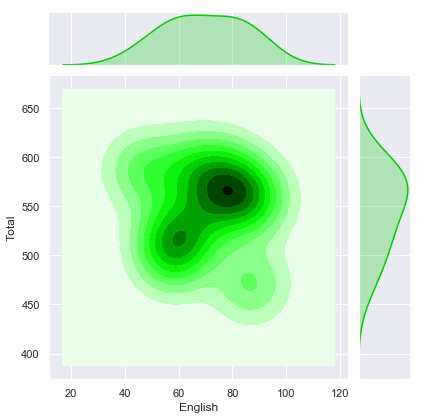

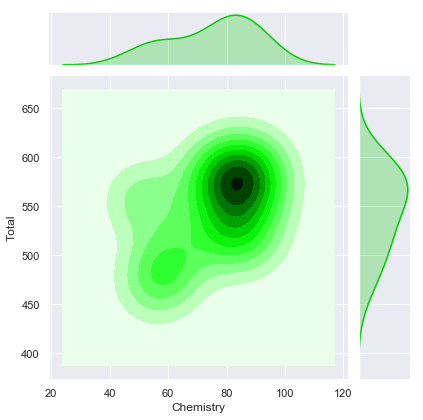

In [19]:
sns.jointplot(df.Maths,df.Total, color="#00cc00",kind='kde')#density plot
sns.jointplot(df.English,df.Total, color="#00cc00",kind='kde')#density plot

sns.jointplot(df.Chemistry,df.Total, color="#00cc00",kind='kde')#density plot

In [20]:
x=df['Maths'].sum()
y=df['Economics'].sum()
z=df['English'].sum()
a=df['History'].sum()
b=df['Civics'].sum()
c=df['Physics'].sum()
d=df['Chemistry'].sum()
e=df['Biology'].sum()

In [22]:
fig = go.Figure(data=[go.Pie(labels=['Maths','Economics','English','History','Civics','Physics','Chemistry','Biology'],
                             values= [x,y,z,a,b,c,d,e],hole =.8)])
fig.update_layout(title_text='Marks Distribution',plot_bgcolor='darkcyan')
fig.show()